In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from pandas import read_csv
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = read_csv('/content/drive/MyDrive/HW-2_ML/heart_disease_uci.csv')

In [4]:
df.head(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [6]:
df.rename(columns={'dataset': 'Location'}, inplace=True)

In [7]:
total_null_values = df.isnull().sum()
na_columns=[]
for column, na_count in total_null_values.items():
    print(f'{column}: {round(na_count*100/920,2)}%')
    if (na_count*100/920)>30:
        na_columns.append(column)
print(f'columns with high Na values are:{na_columns}')

id: 0.0%
age: 0.0%
sex: 0.0%
Location: 0.0%
cp: 0.0%
trestbps: 6.41%
chol: 3.26%
fbs: 9.78%
restecg: 0.22%
thalch: 5.98%
exang: 5.98%
oldpeak: 6.74%
slope: 33.59%
ca: 66.41%
thal: 52.83%
num: 0.0%
columns with high Na values are:['slope', 'ca', 'thal']


In [8]:
df['restecg'].fillna(method='bfill', inplace=True)
df['fbs'].fillna(method='bfill', inplace=True)
df['exang'].fillna(method='bfill', inplace=True)

In [9]:
df['thalch'] = df['thalch'].fillna(df['thalch'].mean())
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].mean())
df['trestbps'] = df['trestbps'].fillna(df['trestbps'].mean())
df['chol'] = df['chol'].fillna(df['trestbps'].mean())

In [10]:
df.isnull().sum()

id            0
age           0
sex           0
Location      0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalch        0
exang         0
oldpeak       0
slope       309
ca          611
thal        486
num           0
dtype: int64

In [11]:
from scipy.stats import chi2_contingency
for i in na_columns:
    contingency_table = pd.crosstab(df[i], df['num'])
    chi2 =  chi2_contingency(contingency_table)[0]
    cramers_v = np.sqrt(chi2 / (df.shape[0] * (min(2, 2) - 1)))

# Print Cramer's V
    print(f'correlation between {i} and num if {round(cramers_v*100,2)}%')

correlation between slope and num if 33.64%
correlation between ca and num if 34.93%
correlation between thal and num if 35.21%


In [15]:
df

,id,age,sex,Location,cp,trestbps,chol,fbs,restecg,exang,oldpeak,num
0,1,63,Male,Cleveland,typical angina,145.000000,233.0,True,lv hypertrophy,False,2.300000,0
1,2,67,Male,Cleveland,asymptomatic,160.000000,286.0,False,lv hypertrophy,True,1.500000,2
2,3,67,Male,Cleveland,asymptomatic,120.000000,229.0,False,lv hypertrophy,True,2.600000,1
3,4,37,Male,Cleveland,non-anginal,130.000000,250.0,False,normal,False,3.500000,0
4,5,41,Female,Cleveland,atypical angina,130.000000,204.0,False,lv hypertrophy,False,1.400000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.000000,333.0,True,st-t abnormality,False,0.000000,1
916,917,62,Male,VA Long Beach,typical angina,132.132404,139.0,False,st-t abnormality,False,0.878788,0
917,918,55,Male,VA Long Beach,asymptomatic,122.000000,223.0,True,st-t abnormality,False,0.000000,2
918,919,58,Male,VA Long Beach,asymptomatic,132.132404,385.0,True,lv hypertrophy,True,0.878788,0


In [16]:
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['sex', 'Location', 'cp', 'fbs', 'restecg', 'exang']

# Initialize LabelEncoder
label_encoders = {}

for column in columns_to_encode:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    label_encoders[column] = label_encoder



In [17]:
df

,id,age,sex,Location,cp,trestbps,chol,fbs,restecg,exang,oldpeak,num
0,1,63,1,0,3,145.000000,233.0,1,0,0,2.300000,0
1,2,67,1,0,0,160.000000,286.0,0,0,1,1.500000,2
2,3,67,1,0,0,120.000000,229.0,0,0,1,2.600000,1
3,4,37,1,0,2,130.000000,250.0,0,1,0,3.500000,0
4,5,41,0,0,1,130.000000,204.0,0,0,0,1.400000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,0,3,0,127.000000,333.0,1,2,0,0.000000,1
916,917,62,1,3,3,132.132404,139.0,0,2,0,0.878788,0
917,918,55,1,3,0,122.000000,223.0,1,2,0,0.000000,2
918,919,58,1,3,0,132.132404,385.0,1,0,1,0.878788,0


In [23]:
# Columns to one-hot encode
columns_to_encode = ['sex', 'Location', 'cp', 'fbs', 'restecg', 'exang']

# Perform one-hot encoding
df = pd.get_dummies(df, columns=columns_to_encode)

In [24]:
df.head(5)

,id,age,trestbps,chol,oldpeak,num,sex_0,sex_1,Location_0,Location_1,...,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1
0,1,63,145.0,233.0,2.3,0,0,1,1,0,...,0,0,1,0,1,1,0,0,1,0
1,2,67,160.0,286.0,1.5,2,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
2,3,67,120.0,229.0,2.6,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
3,4,37,130.0,250.0,3.5,0,0,1,1,0,...,0,1,0,1,0,0,1,0,1,0
4,5,41,130.0,204.0,1.4,0,1,0,1,0,...,1,0,0,1,0,1,0,0,1,0


In [25]:
df.dtypes

id              int64
age             int64
trestbps      float64
chol          float64
oldpeak       float64
num             int64
sex_0           uint8
sex_1           uint8
Location_0      uint8
Location_1      uint8
Location_2      uint8
Location_3      uint8
cp_0            uint8
cp_1            uint8
cp_2            uint8
cp_3            uint8
fbs_0           uint8
fbs_1           uint8
restecg_0       uint8
restecg_1       uint8
restecg_2       uint8
exang_0         uint8
exang_1         uint8
dtype: object

In [26]:
#initial split of 8:2
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [27]:
print(train.shape)
print(test.shape)

(736, 23)
(184, 23)


In [29]:
X_train = train.drop(['num'], axis = 1)
Y_train = train['num']

X_test = test.drop(['num'], axis = 1)
Y_test = test['num']

In [30]:
print(X_train.shape)
print(Y_test.shape)

(736, 22)
(184,)


#Naive Bayes Classifier

In [32]:
#considering the prior is same and calculating only on the basis of mean and variance

means = train.groupby(["num"]).mean()
var = train.groupby(["num"]).var()
classes = np.unique(train["num"].tolist())

In [33]:
def Normal(data, mu, var):
    sd = np.sqrt(var)
    pdf = (np.e ** (-0.5 * ((data - mu)/sd) ** 2)) / (sd * np.sqrt(2 * np.pi))

    return pdf

In [34]:
def Predict(X):
    Predictions = []

    for i in X.index:

        ClassLikelihood = []
        instance = X.loc[i]

        for cls in classes:

            FeatureLikelihoods = []
            for col in X.columns:
                data = instance[col]
                mean = means[col].loc[cls]
                variance = var[col].loc[cls]

                Likelihood = Normal(data, mean, variance)

                if Likelihood != 0:
                    Likelihood = np.log(Likelihood) #log-likelihood evaluated at x
                else:
                    Likelihood = 1/len(train)

                FeatureLikelihoods.append(Likelihood)

            TotalLikelihood = sum(FeatureLikelihoods) #Calculating posterior
            ClassLikelihood.append(TotalLikelihood)

        MaxIndex = ClassLikelihood.index(max(ClassLikelihood)) # Finding largest posterior
        Prediction = classes[MaxIndex]
        Predictions.append(Prediction)

    return Predictions

In [35]:
PredictTrain = Predict(X_train)
PredictTest = Predict(X_test)

<ipython-input-33-fd989ca100cb>:3: RuntimeWarning: invalid value encountered in double_scalars
  pdf = (np.e ** (-0.5 * ((data - mu)/sd) ** 2)) / (sd * np.sqrt(2 * np.pi))
<ipython-input-33-fd989ca100cb>:3: RuntimeWarning: divide by zero encountered in double_scalars
  pdf = (np.e ** (-0.5 * ((data - mu)/sd) ** 2)) / (sd * np.sqrt(2 * np.pi))


In [36]:
print("Training set accuracy", round(accuracy_score(Y_train, PredictTrain), 4)*100,"%")
print("Testing set accuracy", round(accuracy_score(Y_test, PredictTest), 4)*100,"%")

#we can see that both are close to equal

Training set accuracy 59.650000000000006 %
Testing set accuracy 51.629999999999995 %


In [37]:
def f1_score(y, y_hat):
    tp = 0
    tn = 0
    fp =0
    fn = 0

    for i, j in zip(y, y_hat):
        if i ==1 and j==1:
            tp = tp + 1
        elif i==0 and j==0:
            tn = tn + 1
        elif i==1 and j==0:
            fp = fp+1
        elif i==0 and j==1:
            fn = fn+1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1score = (tp + tn)/ (tp + tn + fp + fn)
    return round(precision, 4), round(recall, 4), round(f1score, 4)

In [38]:
print("Precision, Recall and F1 score of the Naive Bayes Algorithm: ",f1_score(Y_test, PredictTest))

#f1 score is close to the accuracy achieved earlier

Precision, Recall and F1 score of the Naive Bayes Algorithm:  (0.6296, 0.7083, 0.7364)


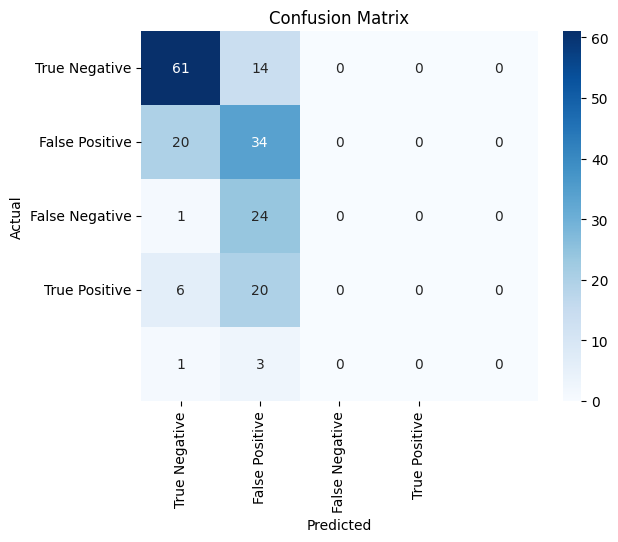

In [41]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
import seaborn as sns

confusion_matrix = metrics.confusion_matrix(Y_test, PredictTest)
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###KNN

In [42]:
from collections import Counter

In [43]:
def L2_distance(a, b):
    dim = len(a)
    distance = 0

    for d in range(dim):
        distance += np.square(abs(a[d] - b[d]))

    distance = np.sqrt(distance)

    return distance

In [44]:
#normalizing using F(X) = (X −mean)/std

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [45]:
def knn_predict(X_train, Y_train, X_test, Y_test, k):
    y_hat_test = []

    for test_point in X_test:
        distances = []

        for train_point in X_train:
            distance = L2_distance(test_point, train_point)
            distances.append(distance)

        df_dists = pd.DataFrame(data=distances, columns=['dist'],
                                index=Y_train.index)

        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]

        counter = Counter(Y_train[df_nn.index])

        prediction = counter.most_common()[0][0]

        y_hat_test.append(prediction)

    return y_hat_test

In [46]:
from sklearn.model_selection import StratifiedKFold

#implementing a 4-fold to test different values of k

strtfdKFold = StratifiedKFold(n_splits=4)
kfold = strtfdKFold.split(X_train, Y_train)

In [47]:
k_values = [1, 7, 18, int(np.sqrt(len(X_train)))]

#we know from theory that sqrt of the length of samples will provide the best value of k, so testing this theory
scores = []
for k, (t, v) in enumerate(kfold):
    y_hat_test = knn_predict(X_train[t, :], Y_train.iloc[t], X_train[v, :], Y_train.iloc[v],  k_values[k])
    score = accuracy_score(Y_train.iloc[v], y_hat_test)
    scores.append(score)
    print('Fold: %2d, value of k: %2d, Training/validation Split Distribution: %s, Validation Accuracy: %.3f' % (k+1, k_values[k], np.bincount(Y_train.iloc[t]), score*100))


print("Average validation accuracy: ", np.mean(scores))

Fold:  1, value of k:  1, Training/validation Split Distribution: [252 159  63  60  18], Validation Accuracy: 53.804
Fold:  2, value of k:  7, Training/validation Split Distribution: [252 158  63  61  18], Validation Accuracy: 58.696
Fold:  3, value of k: 18, Training/validation Split Distribution: [252 158  63  61  18], Validation Accuracy: 55.435
Fold:  4, value of k: 27, Training/validation Split Distribution: [252 158  63  61  18], Validation Accuracy: 61.957
Average validation accuracy:  0.5747282608695652


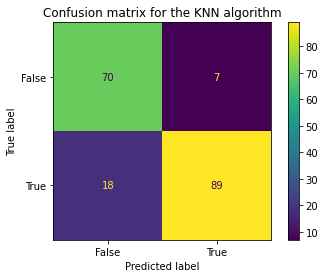

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(Y_test, PredictTest)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.title("Confusion matrix for the KNN algorithm")
plt.show()